<a href="https://www.kaggle.com/code/prasadposture121/titanic-a-data-backed-story?scriptVersionId=133933021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h5 align='right'>Prasad Posture</h5>

# Titanic : A Data-Backed Story
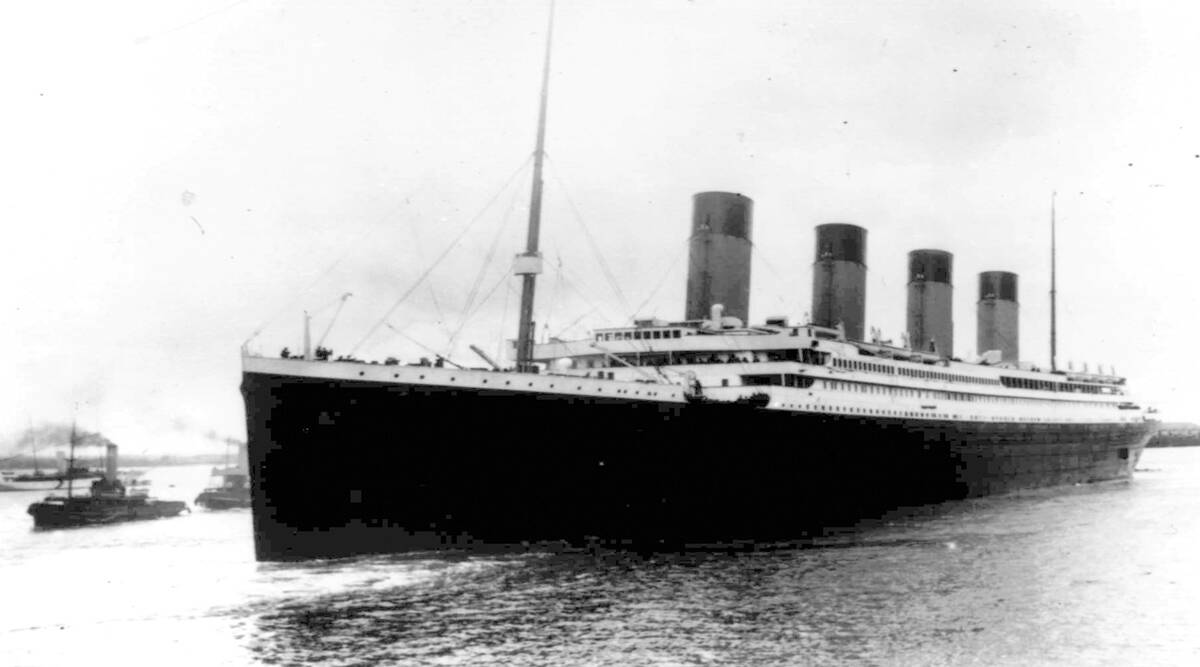

# Problem Statement
The sinking of the Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, we need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data.

# My Approach
Though our primary goal is to build a predictive model while using machine learning algorithms, I will be equally focusing on the exploratory data analysis part, where we will analyze the data thoroughly and try to understand what are the major factors that increased the chances of survival. We will use visualizations and statistical methods to detect anamolies in the data and will try to find satisfactory explaination. In here, you will also learn about 'How to ask the right questions?', 'How to tell a story with data?', and many things related to machine learning as well. I will try to make this notebook as interesting as possible to understand the story of the Titanic crash, so, please check out the whole notebook. This notebook will surely help you, if you are just getting started with data science.

# Importing dependencies & data

In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Loading the train data
Titanic=pd.read_csv('/kaggle/input/titanic/train.csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape of the training dataset i.e. No. of rows and columns
Titanic.shape

(891, 12)

In [4]:
# General Information
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Engineering
This step is usally followed by the Exploratory Data Analysis and that's a perfect approach, because you can't create new features until you have understood your data completely and EDA helps in that. But in here, I assumed that you are well-aware about the data and also we need to analyze the newly created features as well hence we are doing the feature engineering before EDA.

**Note:** Remember, We should always define functions and use them while manipulating the data, because we can use these functions later on test dataset as well while making predictions.

### Title
Observe that the `Name` column contains different titles in them. They could be Mr, Mrs, Miss, etc. And I believe this title could be of much use while making predictions about the survial. Therefore we will extract them using a function.

In [5]:
# Defining a function to extract the titles
def title_extracter(df):
    df['Title'] =  df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [6]:
# Extracting the titles form train data
title_extracter(Titanic)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Surname
We can also use their surname to group the families together and see if families have higher rates of survival.

In [7]:
def surname_extracter(df):
    df['Surname'] = df['Name'].str.split(',').apply(lambda x: x[0])

In [8]:
surname_extracter(Titanic)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


### Ticket Group
This refers to the number of people sharing same ticket number, they could family, friends or people from similiar organization.

In [9]:
def ticket_grouper(df):
    ticket_id = list(df['Ticket'].value_counts().index)
    ticket_count = list(df['Ticket'].value_counts())
    res = {ticket_id[i]: ticket_count[i] for i in range(len(ticket_id))}
    df['Ticket_Group']=df['Ticket'].replace(res)

In [10]:
ticket_grouper(Titanic)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1


### Cabin Text
If you observed carefully the cabin column it contains alphanumeric values, we will seperate the text from the numbers and store it in another column.

In [11]:
def cabin_text_ext(df):
    df['Cabin_Text']=df['Cabin'].str.split().apply(lambda x: str(x)[2])
    df['Cabin_Text'].replace({'n':np.nan}, inplace=True)

In [12]:
cabin_text_ext(Titanic)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,NaN


### Age Group

In [13]:
def age_grouper(df):
    df['Age_Group'] = pd.cut(df['Age'], bins=[0,13,19,25,60,100], labels=['Kid','Teen','Young','Adult','Old'], include_lowest=True)

In [14]:
age_grouper(Titanic)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,1,NaN,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,NaN,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,C,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,NaN,Adult


# Exploratory Data Analalysis
Let me tell you a story, a story of survival of passengers of the Titanic ship, which is a remarkable one. The factors that affected the survival of passengers included gender, age, and social class (passenger class) and many others. When the Titanic hit an iceberg and began to sink, the crew started to load the lifeboats with passengers. However, there were not enough lifeboats for everyone on board, and many passengers were left behind. Let's find all the factors and their inter-relationship that helped some people to survive this disaster.

### Statistical Information

In [15]:
# Statistical Informatino of Numerical Attributes
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_Group
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.787879
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.361142
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,7.000000


The numeric columns give us information about the mean, standard devian, minimum, maximum and quartiles.

In [16]:
# Statistical Information of the Categorical Columns
Titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title,Surname,Cabin_Text
count,891,891,891,204,889,891,891,204
unique,891,2,681,147,3,17,667,8
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Mr,Andersson,C
freq,1,577,7,4,644,517,9,59


Here we can see the number of unique categorical values for each attribute, most frequent value and the frequency of that value.

### Survived
Let's see how many of the total people could survive and how many died.

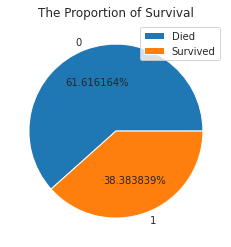

In [17]:
plt.pie(x=Titanic['Survived'].value_counts(),
       labels=Titanic['Survived'].value_counts().index,
       autopct='%f%%')
plt.legend(['Died','Survived'])
plt.title('The Proportion of Survival');

Around 38.38% of the total people survived the crash. The low survival rate suggests that there were not enough lifeboats for all the passengers, and that some groups of passengers were more likely to survive than others. The dataset can help us further explore these factors and understand how they affected the chances of survival.

#### Function for Aggregation and Survival Rate

In [18]:
def SurvivalAndDeath(index_name, columns='Survived', values='PassengerId', aggfunc='count'):
    df = Titanic.pivot_table(index=index_name, columns=columns, values=values, aggfunc=aggfunc)
    df[0] = df[0].fillna(0)
    df[1] = df[1].fillna(0)
    df['Total'] = df[0] + df[1]
    df['Died %'] = df[0]/df['Total']
    df['Survived %'] = df[1]/df['Total']
    return df

### Passenger Class (Pclass)
Here 1 stands for first class, 2 for second, and 3 for third. The passenger class is also the indicator of socio-economic status.

In [19]:
SurvivalAndDeath('Pclass')

Survived,0,1,Total,Died %,Survived %
Pclass,,,,,
1,80,136,216,0.370370,0.629630
2,97,87,184,0.527174,0.472826
3,372,119,491,0.757637,0.242363


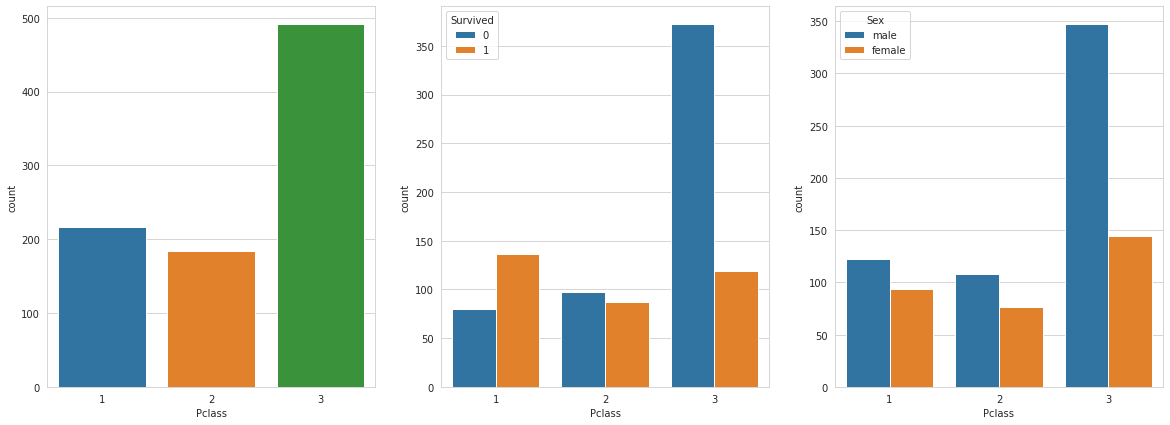

In [20]:
fig, axes = plt.subplots(1,3, figsize=(20,7))
sns.countplot(data=Titanic, x='Pclass', ax=axes[0])
sns.countplot(data=Titanic, x='Pclass', hue='Survived', ax=axes[1])
sns.countplot(data=Titanic, x='Pclass', hue='Sex', ax=axes[2]);

The survival rate for first-class passengers was 62.9%, while the survival rate for second-class passengers was 47.2% and for third-class passengers it was only 24.2%. These numbers indicate a clear correlation between passenger class and survival rate, with first-class passengers having a significantly higher chance of survival than second or third-class passengers. Third class had the highest number of people travelling and highest number of deaths. This suggests that there was a class bias in the distribution of lifeboats, with first-class passengers given priority access to them. It also reflects the social hierarchy of the time, where the lives of the wealthy were deemed more valuable than those of the lower classes.

### Sex

In [21]:
SurvivalAndDeath('Sex')

Survived,0,1,Total,Died %,Survived %
Sex,,,,,
female,81,233,314,0.257962,0.742038
male,468,109,577,0.811092,0.188908


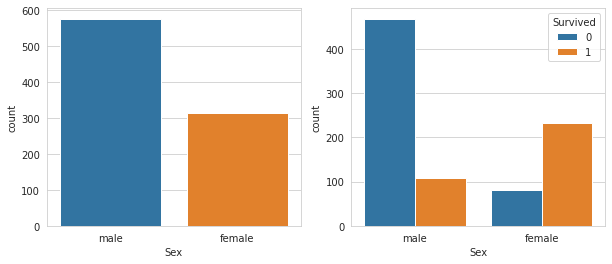

In [22]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=Titanic, x='Sex', ax=axes[0])
sns.countplot(data=Titanic, x='Sex', hue='Survived', ax=axes[1]);

The survival rate of women and men differs vastly. Women were more likely to survive than men, with a survival rate of 74.2% for women compared to only 18.8% for men. This suggests that there was a gender bias in the distribution of lifeboats, with women and children given priority access to them. It also reflects the social norms of the time, where men were expected to be chivalrous and sacrifice their own safety for the benefit of women and children.

### Age & Age Groups

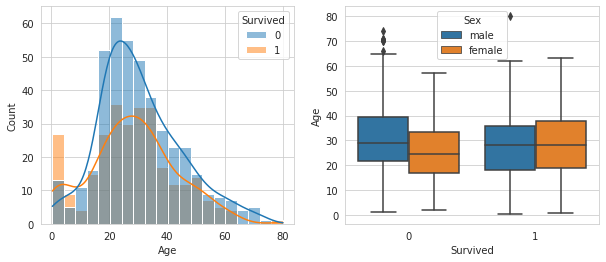

In [23]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.histplot(data=Titanic,x='Age', hue='Survived', kde=True, ax=axes[0])
sns.boxplot(data=Titanic, x='Survived', y='Age', hue='Sex', ax=axes[1]);

In [24]:
SurvivalAndDeath('Age_Group')

Survived,0,1,Total,Died %,Survived %
Age_Group,,,,,
Kid,29,42,71,0.408451,0.591549
Teen,56,37,93,0.602151,0.397849
Young,92,45,137,0.671533,0.328467
Adult,230,161,391,0.588235,0.411765
Old,17,5,22,0.772727,0.227273


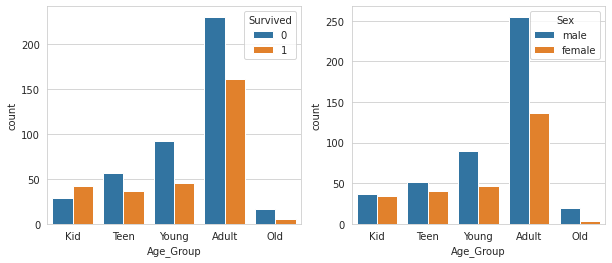

In [25]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.countplot(data=Titanic, x='Age_Group', hue='Survived', ax=axes[0])
sns.countplot(data=Titanic, x='Age_Group', hue='Sex', ax=axes[1]);

Many people people lie between the age of 20-40 so the population on Titanic consists of young and adult people. Children under age 13 had the higher chances of survival (59.1%) while the old age people had the least chances of survival (22.7%). This is because the children were given priority because they were considered more vulnerable and in need of protection.

### Sibling or Spouse (SibSp)

In [26]:
SurvivalAndDeath('SibSp')

Survived,0,1,Total,Died %,Survived %
SibSp,,,,,
0,398.0,210.0,608.0,0.654605,0.345395
1,97.0,112.0,209.0,0.464115,0.535885
2,15.0,13.0,28.0,0.535714,0.464286
3,12.0,4.0,16.0,0.750000,0.250000
4,15.0,3.0,18.0,0.833333,0.166667
5,5.0,0.0,5.0,1.000000,0.000000
8,7.0,0.0,7.0,1.000000,0.000000


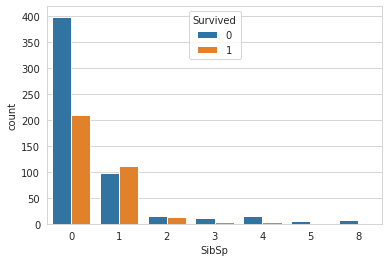

In [27]:
sns.countplot(x=Titanic['SibSp'].fillna(0), hue=Titanic['Survived']);

Passengers who had one or two siblings or spouses aboard were more likely to survive than those who were alone, with a survival rate of 53.5% for 1 and 46.4% for 2 compared to 34.5% for those who traveled alone. This indicates that having family members or close companions on board may have increased the chances of survival, possibly by providing emotional support or assistance in finding and boarding lifeboats. But travelling with larger families also lowered the chances of survival significantly. One possible reason for this is that larger families may have had more difficulty finding and boarding lifeboats together, or may have faced more challenges in navigating the chaotic and crowded conditions aboard the sinking ship.

### Parch

In [28]:
SurvivalAndDeath('Parch')

Survived,0,1,Total,Died %,Survived %
Parch,,,,,
0,445.0,233.0,678.0,0.656342,0.343658
1,53.0,65.0,118.0,0.449153,0.550847
2,40.0,40.0,80.0,0.500000,0.500000
3,2.0,3.0,5.0,0.400000,0.600000
4,4.0,0.0,4.0,1.000000,0.000000
5,4.0,1.0,5.0,0.800000,0.200000
6,1.0,0.0,1.0,1.000000,0.000000


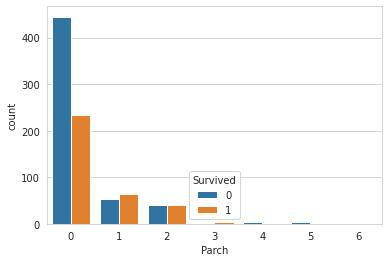

In [29]:
sns.countplot(x=Titanic['Parch'].fillna(0),hue=Titanic['Survived']);

The Parch attribute, which refers to the number of parents or children aboard the Titanic, also had a significant effect on the survival rate. Passengers who had one or two parents or children aboard were more likely to survive than those who were alone, with a survival rate of 50-55% compared to 34.3% for those who traveled alone. However, passengers with four or more parents or children aboard had a lower survival rate. The reason behind this could same as stated under SibSp section.

### Fare

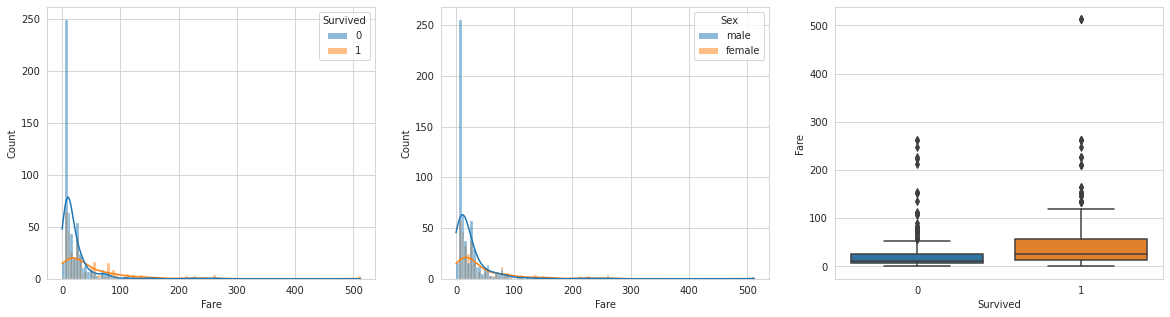

In [30]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.histplot(x=Titanic['Fare'], kde=True, hue=Titanic['Survived'], ax=axes[0])
sns.histplot(x=Titanic['Fare'], kde=True, hue=Titanic['Sex'], ax=axes[1])
sns.boxplot(data=Titanic, y='Fare', x='Survived', ax=axes[2]);

The distribution of Fare is rightly skewed i.e. fewer values with higher magintude. The people who survived had a bit higher median fare and it suffices to show that the rich people were at advantage during the crash as long as the survival is concerned. We will explore this attribute further in combination with others.

### Embarked

In [31]:
SurvivalAndDeath('Embarked')

Survived,0,1,Total,Died %,Survived %
Embarked,,,,,
C,75,93,168,0.446429,0.553571
Q,47,30,77,0.610390,0.389610
S,427,217,644,0.663043,0.336957


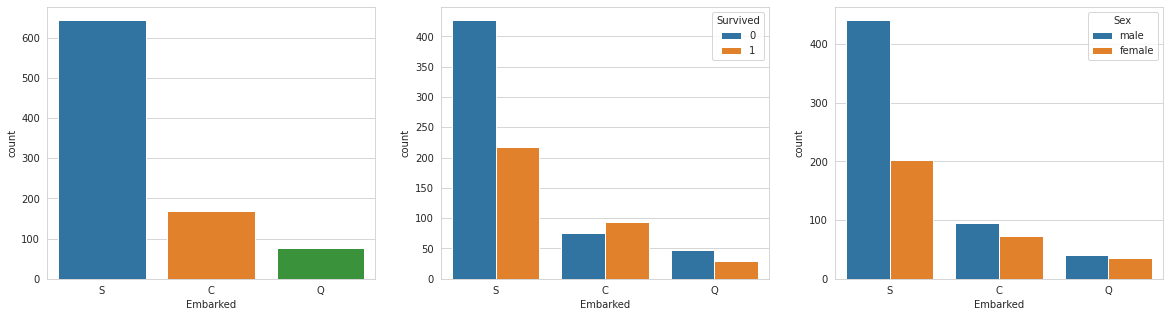

In [32]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.countplot(data=Titanic, x='Embarked', ax=axes[0])
sns.countplot(data=Titanic, x='Embarked', hue='Survived', ax=axes[1])
sns.countplot(data=Titanic, x='Embarked', hue='Sex', ax=axes[2]);

The Embarked attribute refers to the port of embarkation for each passenger. Passengers who embarked from Cherbourg, France had the highest survival rate at 55.3%, followed by passengers who embarked from Queenstown, Ireland at 38.9%, and passengers who embarked from Southampton, England at 33.6%. This indicates that there may have been differences in passenger demographics, such as age, gender, or social class, that varied by port of embarkation and affected their chances of survival. Additionally, passengers who embarked from Cherbourg may have had better access to lifeboats or other resources that increased their chances of survival, or may have been more likely to have favorable seating arrangements on the ship.

### Title

In [33]:
df=SurvivalAndDeath('Title')
df[df[1]>1]

Survived,0,1,Total,Died %,Survived %
Title,,,,,
Dr,4.0,3.0,7.0,0.571429,0.428571
Master,17.0,23.0,40.0,0.425000,0.575000
Miss,55.0,127.0,182.0,0.302198,0.697802
Mlle,0.0,2.0,2.0,0.000000,1.000000
Mr,436.0,81.0,517.0,0.843327,0.156673
Mrs,26.0,99.0,125.0,0.208000,0.792000


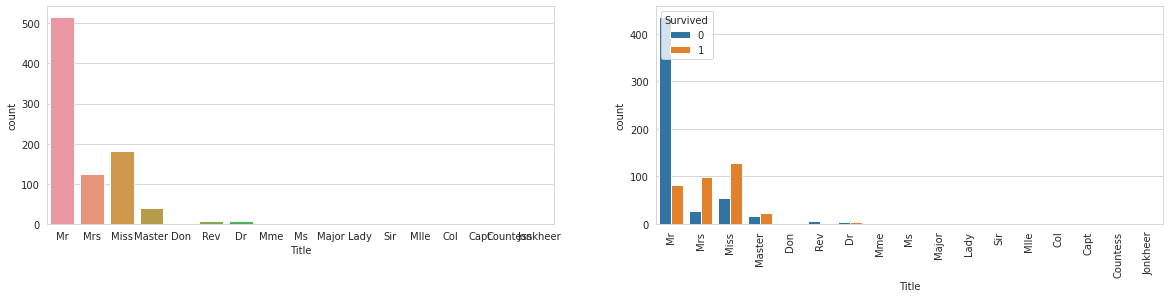

In [34]:
fig, axes = plt.subplots(1,2, figsize=(20,4))
sns.countplot(data=Titanic, x='Title', ax=axes[0])
sns.countplot(data=Titanic, x='Title',hue='Survived', ax=axes[1])
plt.xticks(rotation=90);

The Title attribute refers to the title or honorific of each passenger. Passengers with certain titles, such as "Mrs." or "Miss", had higher survival rates than those with other titles, such as "Mr." or "Master". For example, female passengers with the title "Mrs." had a survival rate of 79.2%, while male passengers with the title "Mr." had a survival rate of only 15.6%. This indicates that there may have been differences in how passengers were treated or prioritized during the evacuation process based on their gender or social status. Additionally, passengers with certain titles may have had access to better accommodations or resources on the ship, which increased their chances of survival.

### Ticket Group

In [35]:
SurvivalAndDeath('Ticket_Group')

Survived,0,1,Total,Died %,Survived %
Ticket_Group,,,,,
1,384.0,163.0,547.0,0.702011,0.297989
2,80.0,108.0,188.0,0.425532,0.574468
3,19.0,44.0,63.0,0.301587,0.698413
4,22.0,22.0,44.0,0.500000,0.500000
5,10.0,0.0,10.0,1.000000,0.000000
6,18.0,0.0,18.0,1.000000,0.000000
7,16.0,5.0,21.0,0.761905,0.238095


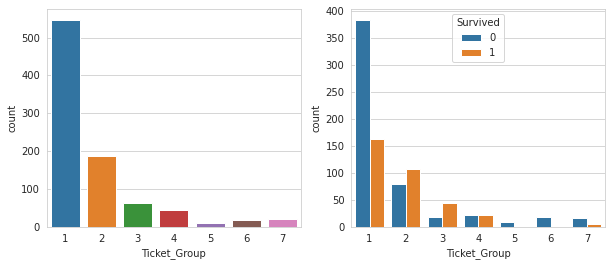

In [36]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.countplot(x=Titanic['Ticket_Group'], ax=axes[0])
sns.countplot(x=Titanic['Ticket_Group'], hue=Titanic['Survived'], ax=axes[1]);

The ticket group referes to the number of people sharing the same ticket. It indicates the total number of people traveling together.Passengers who shared a ticket number with other 2 or 3 passengers had a higher survival rate than those who had unique ticket numbers, with a survival rate of 69.8% for 3 passengers and 57.4% for 2 passengers compared to 29.7% for a single passenger. This indicates that passengers who traveled with family or friends may have had advantages in terms of locating and boarding lifeboats together. However, passengers who shared a ticket number with 5 or more people, also tended to be in lower classes and have lower fares, which were associated with lower survival rates overall. Additionally, passengers with certain ticket numbers may have had access to better accommodations or resources on the ship, which affected their chances of survival.

###  Cabin Text
This column in extracted from Cabin itself.

In [37]:
SurvivalAndDeath('Cabin_Text')

Survived,0,1,Total,Died %,Survived %
Cabin_Text,,,,,
A,8.0,7.0,15.0,0.533333,0.466667
B,12.0,35.0,47.0,0.255319,0.744681
C,24.0,35.0,59.0,0.406780,0.593220
D,8.0,25.0,33.0,0.242424,0.757576
E,8.0,24.0,32.0,0.250000,0.750000
F,5.0,8.0,13.0,0.384615,0.615385
G,2.0,2.0,4.0,0.500000,0.500000
T,1.0,0.0,1.0,1.000000,0.000000


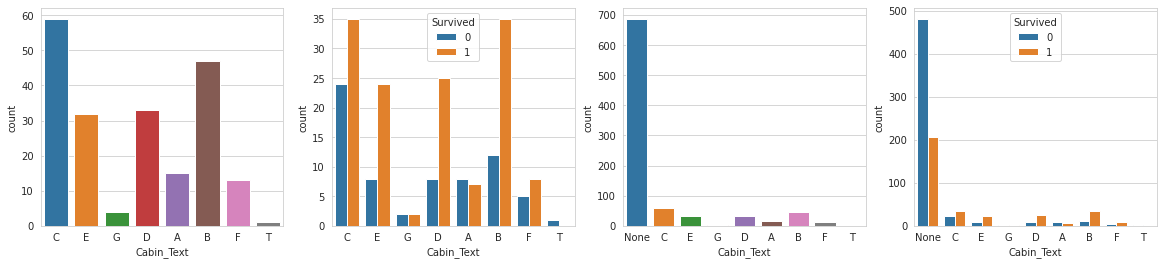

In [38]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
sns.countplot(x=Titanic['Cabin_Text'], ax=axes[0])
sns.countplot(x=Titanic['Cabin_Text'], hue=Titanic['Survived'], ax=axes[1]);
sns.countplot(x=Titanic['Cabin_Text'].fillna('None'), ax=axes[2])
sns.countplot(x=Titanic['Cabin_Text'].fillna('None'), hue=Titanic['Survived'], ax=axes[3]);

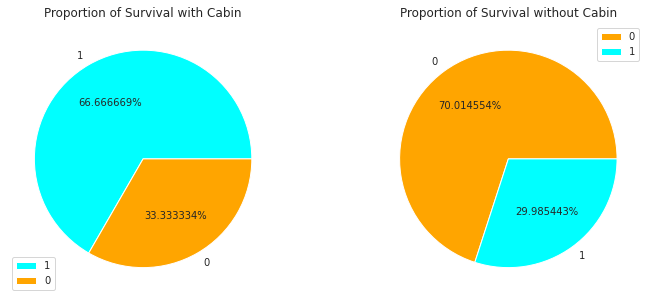

In [39]:
no_cab = Titanic.copy()
no_cab['Cabin_Text'] = Titanic['Cabin_Text'].fillna('None')
cab = no_cab[no_cab['Cabin_Text']!='None']
no_cab = no_cab[no_cab['Cabin_Text']=='None']

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].pie(cab['Survived'].value_counts(),labels=cab['Survived'].value_counts().index,
            autopct='%f%%', colors=['cyan', 'orange'])
axes[0].set_title('Proportion of Survival with Cabin')
axes[0].legend()
axes[1].pie(no_cab['Survived'].value_counts(),labels=no_cab['Survived'].value_counts().index,
            autopct='%f%%', colors=['orange', 'cyan'])
axes[1].set_title('Proportion of Survival without Cabin')
axes[1].legend();

Here, I have extracted the first alphabet from cabin name which was alphanumeric for grouping the cabins and named it as Cabin_Text. From the third plot of barplots it is clear that there are too many people who hadn't assigned any cabin, further analysis shows that these are mostly people from third class. Then we have to pie charts, who make us feel as if the fate is turned around for the people without cabins. Passengers who had a recorded cabin number had a higher survival rate than those who did not, with a survival rate of 66.6% compared to 30%. This indicates that passengers who had assigned cabins may have had advantages in terms of locating and boarding lifeboats, or may have had access to better accommodations or resources on the ship. Additionally, passengers in certain cabin locations may have been more likely to survive based on their proximity to lifeboats or other resources during the evacuation process. Because as indicated by the first chart chances of survival vary within the people having cabin as well.

### SibSp, Parch and Age

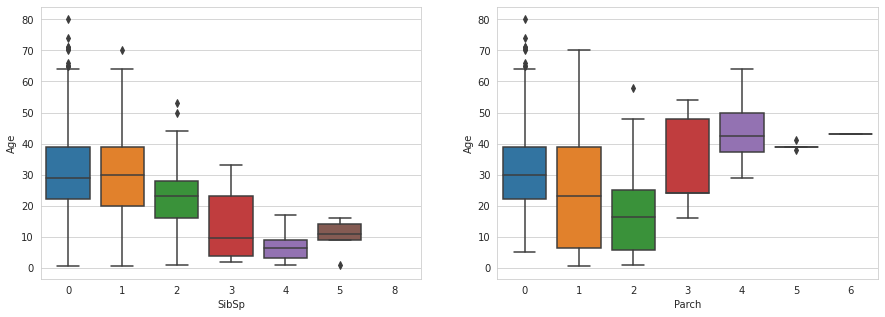

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=Titanic, y='Age',x='SibSp',ax=axes[0])
sns.boxplot(data=Titanic, y='Age',x='Parch',ax=axes[1]);

Generally, younger passengers tended to have more siblings/spouses pr parents/children(parch) on board, while older passengers tended to have fewer or none. However, there were also many exceptions to this pattern, particularly for passengers with larger families or who were traveling with extended family members.

### Cabin Text and Passenger Class

In [41]:
SurvivalAndDeath(index_name=['Cabin_Text','Pclass'])

Survived              0     1  Total    Died %  Survived %
Cabin_Text Pclass                                         
A          1        8.0   7.0   15.0  0.533333    0.466667
B          1       12.0  35.0   47.0  0.255319    0.744681
C          1       24.0  35.0   59.0  0.406780    0.593220
D          1        7.0  22.0   29.0  0.241379    0.758621
           2        1.0   3.0    4.0  0.250000    0.750000
E          1        7.0  18.0   25.0  0.280000    0.720000
           2        1.0   3.0    4.0  0.250000    0.750000
           3        0.0   3.0    3.0  0.000000    1.000000
F          2        1.0   7.0    8.0  0.125000    0.875000
           3        4.0   1.0    5.0  0.800000    0.200000
G          3        2.0   2.0    4.0  0.500000    0.500000
T          1        1.0   0.0    1.0  1.000000    0.000000

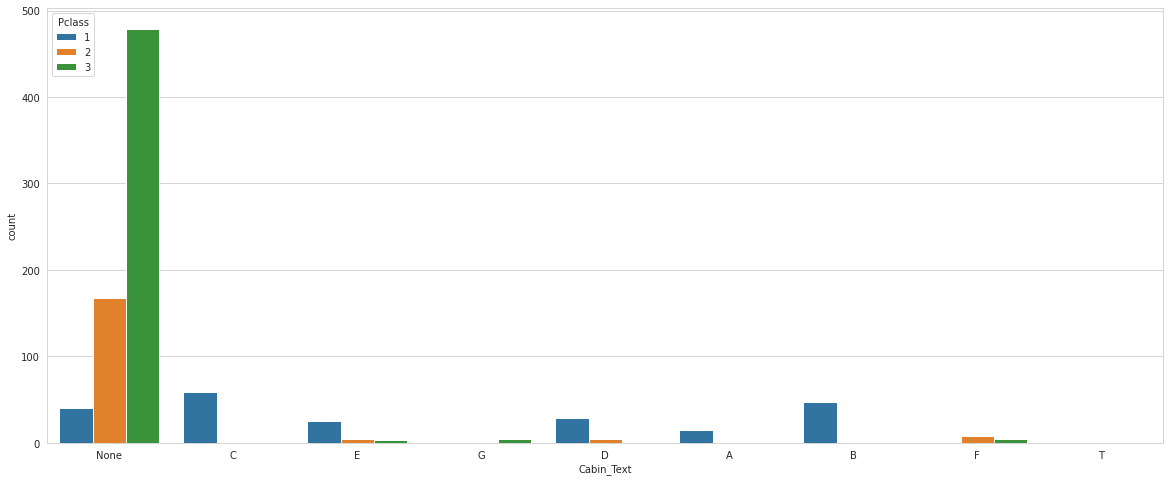

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(x=Titanic['Cabin_Text'].fillna('None'), hue=Titanic['Pclass']);

Passengers with cabin are mostly from the first class and people from third class rarely had any cabins they were in open space. And as we had discussed before, from the chart you can see that the survival rate is higher for people first class and top cabins such as B, D, E.

### Passenger Class and Fare

In [43]:
Titanic.pivot_table(values='Fare', index='Pclass', columns='Survived', aggfunc='median')

Survived,0,1
Pclass,,
1,44.75,77.9583
2,13.00,21.0000
3,8.05,8.5167


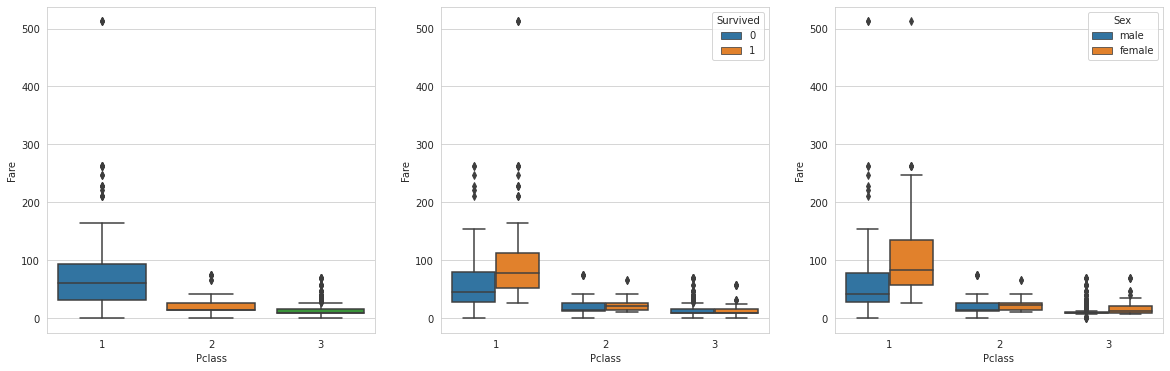

In [44]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(data=Titanic, x='Pclass', y='Fare', ax=axes[0])
sns.boxplot(data=Titanic, x='Pclass', y='Fare', hue='Survived', ax=axes[1])
sns.boxplot(data=Titanic, x='Pclass', y='Fare', hue='Sex', ax=axes[2]);

People from first class spent more on Fare as expected but there are some outliers in the second and third class as well whose total expenditure on Fare is more than the median Fare of first class we will take them into account during the miscellaenous section. From the chart at the beginning, we can see that on an average, for each class people who survived have spent more on the fare than people who died. And if you take a proper look at the third plot for with uses the Sex, female have spent more on Fare than men in almost every class.

### Ticket Group, Sibling/Spouse and Parch

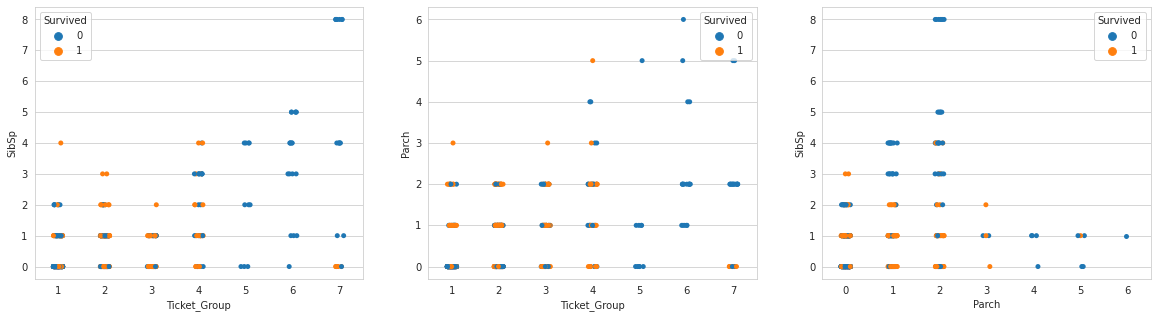

In [45]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.stripplot(data=Titanic, x='Ticket_Group', y='SibSp', ax=axes[0], hue='Survived')
sns.stripplot(data=Titanic, x='Ticket_Group', y='Parch', ax=axes[1], hue='Survived')
sns.stripplot(data=Titanic, x='Parch', y='SibSp', ax=axes[2], hue='Survived');

Passengers who had more Sib/Sp or Parent/Chidlren were likelty to be part of larger ticket group. And also passengers who had more siblings/spouses were more likely to have more parents/children, and vice versa.

### Embarked and Pclass

In [46]:
SurvivalAndDeath(index_name=['Embarked','Pclass'])

Survived           0   1  Total    Died %  Survived %
Embarked Pclass                                      
C        1        26  59     85  0.305882    0.694118
         2         8   9     17  0.470588    0.529412
         3        41  25     66  0.621212    0.378788
Q        1         1   1      2  0.500000    0.500000
         2         1   2      3  0.333333    0.666667
         3        45  27     72  0.625000    0.375000
S        1        53  74    127  0.417323    0.582677
         2        88  76    164  0.536585    0.463415
         3       286  67    353  0.810198    0.189802

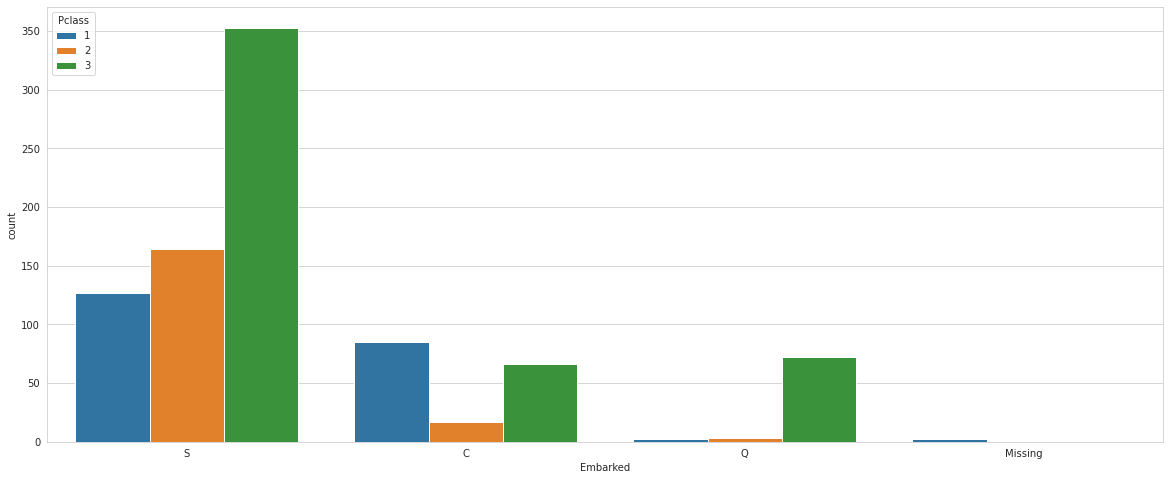

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(x=Titanic['Embarked'].fillna('Missing'), hue=Titanic['Pclass']);

People from first class mostly were from Cherbourg and Southampton and they had the better survival rate. Third class passengers were from Southampton and they had the least chances of survival (18%).

### Fare and Age

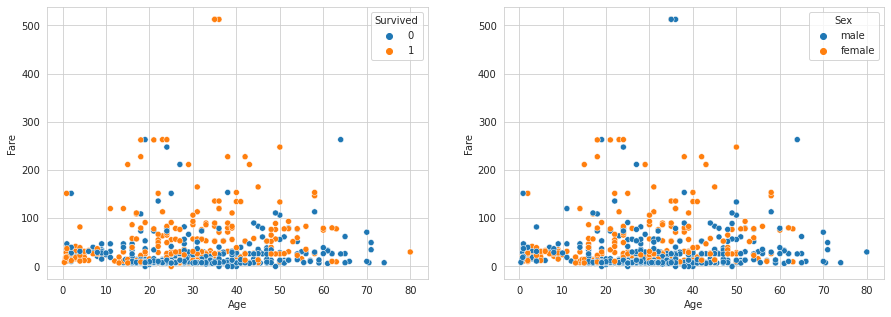

In [48]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=Titanic, x='Age', y='Fare', hue='Survived', ax=axes[0])
sns.scatterplot(data=Titanic, x='Age', y='Fare', hue='Sex', ax=axes[1]);

The fare and age doesn't show any direct relationship between each other, but as we noticed before, passenger with higher fare from all age groups have higher chances of survival, and so the children under age 10. This indicates that passengers who were able to afford more expensive tickets may have had access to better accommodations, such as first-class cabins or better access to lifeboats, which increased their chances of survival. Additionally, passengers who paid higher fares may have had more resources to help them during the sinking, such as access to better food, water, or medical supplies. The higher fares are mostly paid by females and many of them are in the age of 15 to 45. 


### Fare and Ticket Group

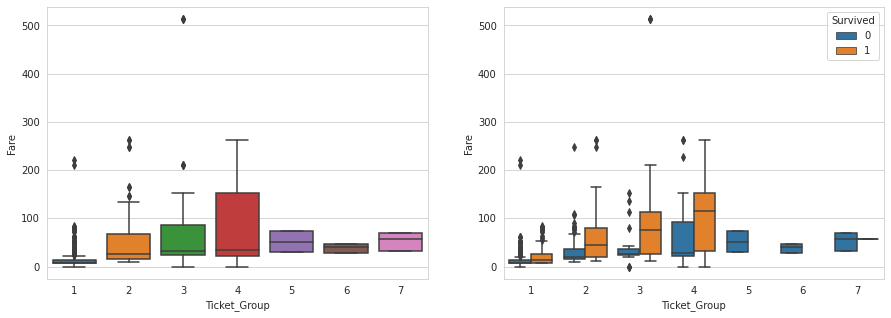

In [49]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=Titanic, x='Ticket_Group', y='Fare', ax=axes[0])
sns.boxplot(data=Titanic, x='Ticket_Group', y='Fare', hue='Survived', ax=axes[1]);

There are no survivers wherever the people are travelling with group of 5,6 & 7. The fare ranges are widely distributed for ticket group of 2,3 & 4.

### Age and Passenger Class

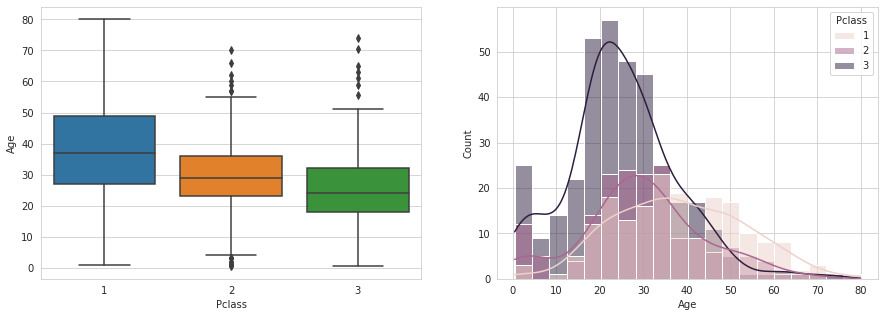

In [50]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=Titanic, x='Pclass', y='Age', ax=axes[0])
sns.histplot(data=Titanic, hue='Pclass', x='Age', ax=axes[1], kde=True);

The median age varies by class with first class having the most elderly people and first class having the younger people.

### Fare and Cabin Text

In [51]:
Titanic.pivot_table(values='Fare', index='Cabin_Text', columns='Survived', aggfunc='median')

Survived,0,1
Cabin_Text,,
A,37.38960,35.50000
B,42.75000,91.07920
C,81.16250,89.10420
D,43.56040,63.35830
E,45.18125,39.82500
F,7.65000,24.17915
G,10.46250,16.70000
T,35.50000,NaN


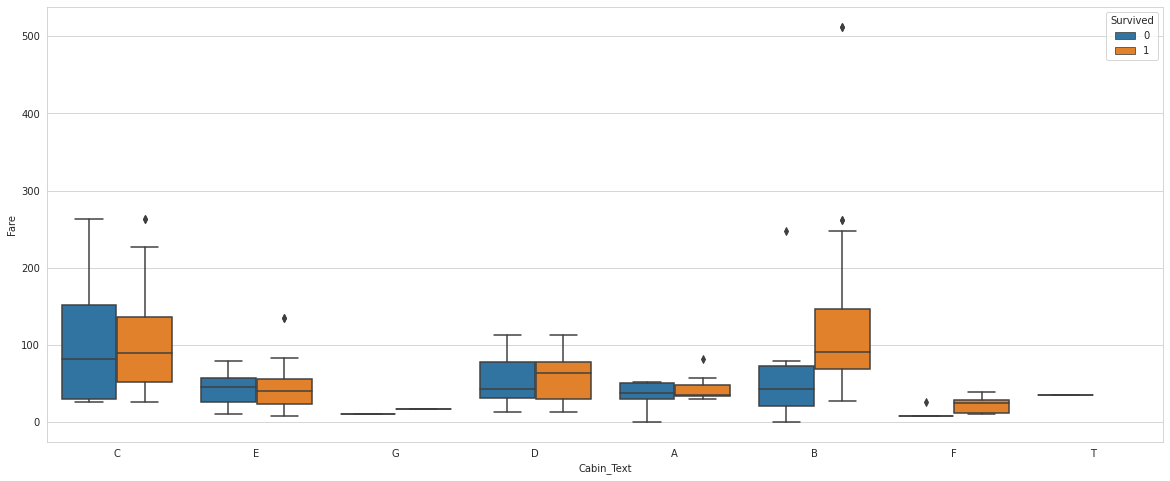

In [52]:
plt.figure(figsize=(20,8))
sns.boxplot(data=Titanic, x='Cabin_Text', y='Fare', hue='Survived');

The fare for similiar types of cabin namely C, E, D, B shows large variations in the fare, the reason behind this could the position of cabins. For the cabin, people who have paid more fare are more likely to survive. The relationship between median fare, cabin and survival rate can be seen in the chart.

### Age Group, Sex and Passenger Class

In [53]:
df = Titanic.pivot_table(index=['Age_Group','Pclass'], columns=['Survived','Sex'], values='PassengerId', aggfunc='count')
df[1]=df[1].fillna(0)
df[0]=df[0].fillna(0)
df['Total_Females']=df[0]['female']+df[1]['female']
df['Total_Males']=df[0]['male']+df[1]['male']
df['SurvivedFemale%'] = df[1]['female']/df['Total_Females']
df['SurvivedMale%'] = df[1]['male']/df['Total_Males']
df

Survived              0           1      Total_Females Total_Males  \
Sex              female male female male                             
Age_Group Pclass                                                     
Kid       1           1    0      0    3             1           3   
          2           0    0      9    9             9           9   
          3          12   16     12    9            24          25   
Teen      1           0    3     13    1            13           4   
          2           0    9      7    1             7          10   
          3           9   35     12    3            21          38   
Young     1           1    4     13    3            14           7   
          2           1   17     12    0            13          17   
          3          11   58      9    8            20          66   
Adult     1           1   43     54   32            55          75   
          2           5   56     40    4            45          60   
          3          23  102     13   18            36         120   
Old       1           0   11      2    1             2          12   
          2           0    2      0    1             0           3   
          3           0    4      1    0             1           4   

Survived         SurvivedFemale% SurvivedMale%  
Sex                                             
Age_Group Pclass                                
Kid       1             0.000000      1.000000  
          2             1.000000      1.000000  
          3             0.500000      0.360000  
Teen      1             1.000000      0.250000  
          2             1.000000      0.100000  
          3             0.571429      0.078947  
Young     1             0.928571      0.428571  
          2             0.923077      0.000000  
          3             0.450000      0.121212  
Adult     1             0.981818      0.426667  
          2             0.888889      0.066667  
          3             0.361111      0.150000  
Old       1             1.000000      0.083333  
          2                  NaN      0.333333  
          3             1.000000      0.000000

In [54]:
# The same information can be obtained using groupby function
df2 = Titanic.groupby(['Age_Group','Pclass','Sex'], as_index=False)['Survived'].mean()

# We will use this for barplots

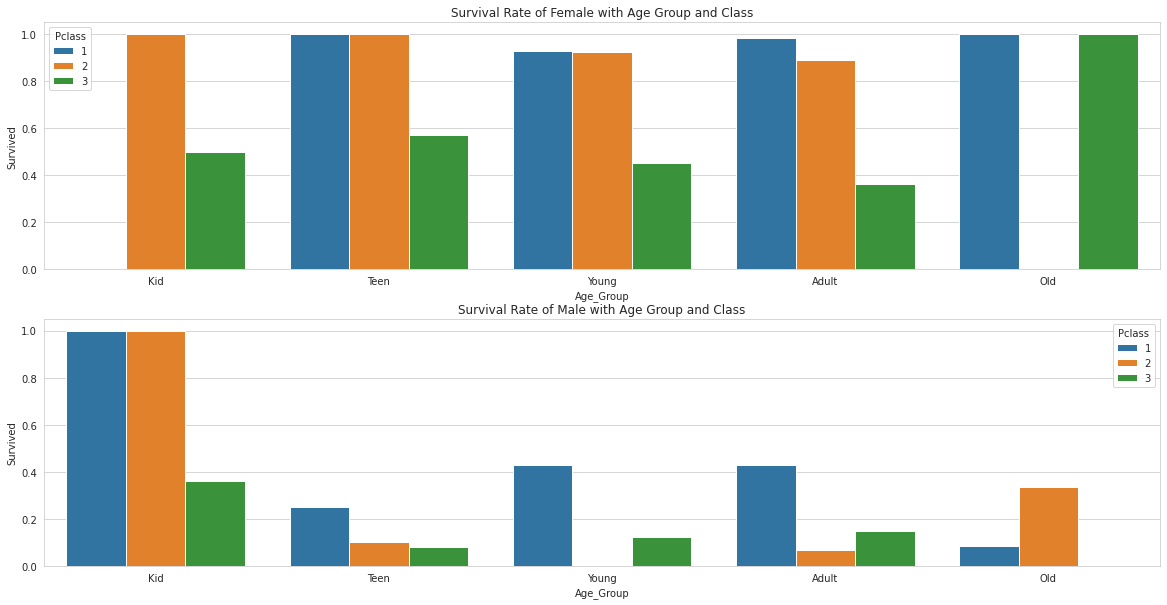

In [55]:
fig, axes = plt.subplots(2,1, figsize=(20,10))

axes[0].set_title('Survival Rate of Female with Age Group and Class')
axes[1].set_title('Survival Rate of Male with Age Group and Class')

fdf=df2[df2['Sex']=='female']
sns.barplot(data=fdf, y='Survived', x='Age_Group', hue='Pclass', ax=axes[0])

mdf=df2[df2['Sex']=='male']
sns.barplot(data=mdf, y='Survived', x='Age_Group', hue='Pclass', ax=axes[1]);

Age Group, Passenger Class and Gender these are the three major factors that are directly associated with the survival rate. The chart given below summarizes the relationship between these three in a completer manner. If we go by the total number of survivers, first class adult(25-59) females have the highest rate survival among all of them which is 98.18% (54/55 survivers) followed by young(20-24) female from first and second class with survival rate 92.85% and 92.30% respectively. The chart above which breaks down the survival rate with the main three factors revealed a surprising fact that the young male from the second class has the least chances of survival (0%) followed by adult male from second class with 6.66% survival rate, afterwards teen male from third class with 7.89% of survival rate. It was natural for us to assume that third class adult male will have least chances of survival but the data reveals that they have 15% chance of survival it is still lesser but not compared the other groups.

## Miscellaneous

### Special Titles
This refers to the titles other than Mr, Mrs, Miss and Master. The another reason I'm calling them as the special titles because if you take look at their class all of them are from either first class or second class and most of them are adults. And these titles suggest their special posts such Doctor, Captain, Colonel etc.

In [56]:
# Here is the list of people with special titles
sptitle=Titanic[(Titanic['Title']!='Mr')&(Titanic['Title']!='Mrs')&(Titanic['Title']!='Miss')&(Titanic['Title']!='Master')]
sptitle

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text,Age_Group
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don,Uruchurtu,1,NaN,Adult
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,Rev,Byles,1,NaN,Adult
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,Rev,Bateman,1,NaN,Adult
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr,Minahan,2,C,Adult
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,Rev,Carter,2,NaN,Adult
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr,Moraweck,1,NaN,Adult
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Mme,Aubart,2,B,Young
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr,Pain,1,NaN,Young
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Ms,Reynaldo,1,NaN,Adult
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Major,Peuchen,1,C,Adult


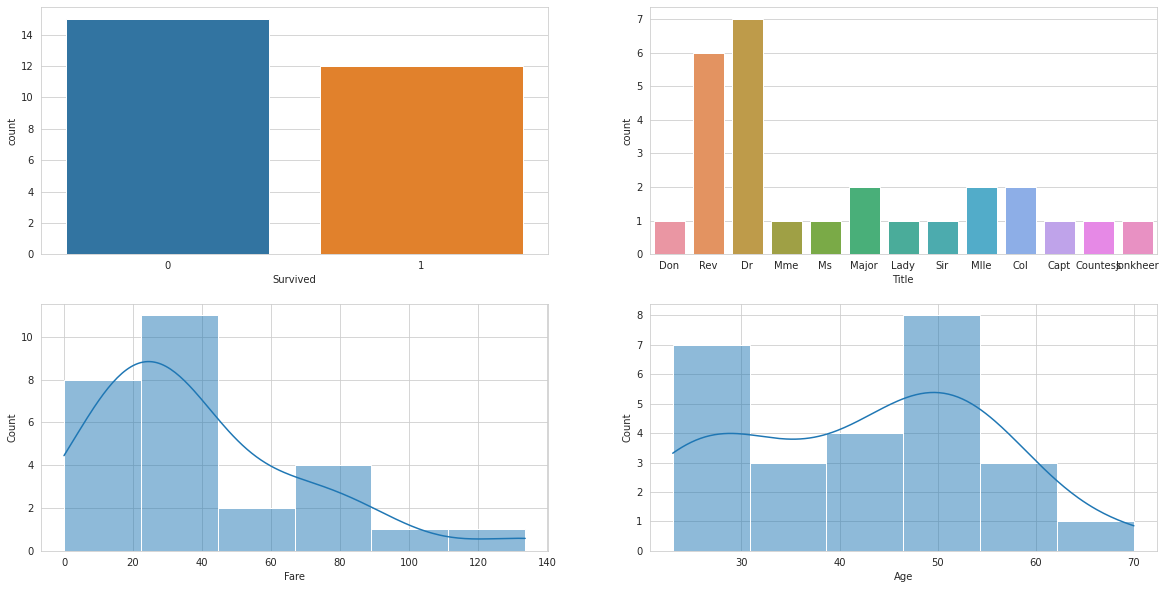

In [57]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
sns.countplot(data=sptitle, x='Survived', ax=axes[0,0])
sns.countplot(data=sptitle, x='Title', ax=axes[0,1])
sns.histplot(data=sptitle, x='Fare', kde=True, ax=axes[1,0])
sns.histplot(data=sptitle, x='Age', kde=True, ax=axes[1,1]);

### The Sage Family
While checking the relationship of passenger class with the fare we observed that there were entries in the third class whose fare was greater than the median fare of first class. Let's check those entries.

In [58]:
#Calculating the median fare for the first class (MFFC)
MFFC = Titanic[Titanic['Pclass']==1]['Fare'].median()

# Getting the list of passengers from the third class whose fare is greater than median fare of first class
Titanic[(Titanic['Fare']>MFFC) & (Titanic['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text,Age_Group
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Master,Sage,7,NaN,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,Sage,7,NaN,NaN
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,Sage,7,NaN,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,Sage,7,NaN,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,Sage,7,NaN,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,Sage,7,NaN,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,Sage,7,NaN,NaN


voilà it's the Sage family. We have only found 7 members of this family here (in the train data) but a proper look at SibSp and Parch suggests there has to be 11 members so that each of them could have 8 siblings and 2 parents. And the parents aren't here because then the number of spouse would have been 1 for them and Parch will be 9. The only possible explaination is if the other family members are in noted in the test data (which is indeed the case if you checked.)
But it still doesn't explain the ridiculously high fare for third class that too without cabin. Additionally none of their ages are mentioned. To know more about this family whose all of the member died, [checkout this article](https://www.bbc.com/news/uk-england-cambridgeshire-17596264).

### The Andersson Family

In [59]:
Titanic[(Titanic['Surname']=='Andersson')&(Titanic['Ticket']=='347082')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text,Age_Group
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,Andersson,7,NaN,Adult
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Andersson,7,NaN,Kid
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Andersson,7,NaN,Kid
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,Andersson,7,NaN,Kid
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,Andersson,7,NaN,Adult
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Andersson,7,NaN,Kid
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Andersson,7,NaN,Kid


Since the age is given here, we can easily identify the parents and the kids. Here nothing feels so suspicous, the fare is suitable for the third class. The only problematic thing here is that none of them could survive. You can read more about them [here](https://www.encyclopedia-Titanica.org/Titanic-victim/anders-andersson.html).

### ~7 Friends~ 8 Friends
While grouping the passengers based on there ticket number I found this one ticket number '1601' which had 7 bearers in the train dataset. The unusual thing about them that grabbed my attention was, they are not related to each other and that is clear from the SibSp and Parch column. While researching further I came across this [article](https://www.fotmpdc.org/chinese_passengers) this were infact 8 friends travelling together to Cuba for work and 6 of them could survive. We have 7 of them here and 1 of them in the test data (checked it). Nothing much information is available about them except for the fact that they were all traveling in third class with Fare nearly equal to the median Fare of the first class.

In [60]:
Titanic[Titanic['Ticket']=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text,Age_Group
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr,Bing,7,NaN,Adult
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr,Ling,7,NaN,Adult
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,Mr,Lang,7,NaN,Adult
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,Mr,Foo,7,NaN,NaN
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,Mr,Lam,7,NaN,NaN
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,Mr,Lam,7,NaN,NaN
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,Mr,Chip,7,NaN,Adult


### Highest Fares
When I looked for the Fare vs Pclass plot I observed, three of the people paid fare greater than $500. All of the from the first class (not so surprisingly). Their ticket number is same, they are almost of same age. One of them has wife, she has to be in the test data (cheked) and she definitely survived the crash.

In [61]:
Titanic[Titanic['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_Group,Cabin_Text,Age_Group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Ward,3,NaN,Adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Cardeza,3,B,Adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Lesurer,3,B,Adult


# Data Preprocessing
Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:
1. Identifying the input and target columns
2. Identifying numerical and categorical columns
3. Imputing numeric values
4. Scaling numeric features
5. Encoding the categorical columns

### Identifying Input and Target Columns
We will only choose those columns which do not siginficant amoung of unique values.

In [62]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title',
       'Ticket_Group', 'Cabin_Text', 'Age_Group']
target_col = 'Survived'

In [63]:
inputs_df = Titanic[input_cols].copy()
target = Titanic[target_col].copy()

### Identify Numeric and Categorical Data

In [64]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_Group']

In [65]:
categorical_cols = inputs_df.select_dtypes('object').columns.tolist()
categorical_cols

['Sex', 'Embarked', 'Title', 'Cabin_Text']

### Imputing Numeric Values
We will fill all the missing values from the numeric features with median.

In [66]:
# Before imputing
inputs_df[numeric_cols].isnull().sum()

Pclass            0
Age             177
SibSp             0
Parch             0
Fare              0
Ticket_Group      0
dtype: int64

In [67]:
# Importing imputer
from sklearn.impute import SimpleImputer

# Setting imputation strategy
imputer = SimpleImputer(strategy='median')

# Fitting the imputer
imputer.fit(inputs_df[numeric_cols])

# Transforming numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [68]:
# After imputing
inputs_df[numeric_cols].isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Ticket_Group    0
dtype: int64

### Scaling the Numeric Features
We scale down all the numeric features between the range of [0,1]

In [69]:
# Before Scaling
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,Pclass,Age,SibSp,Parch,Fare,Ticket_Group
min,1.0,0.42,0.0,0.0,0.0000,1.0
max,3.0,80.00,8.0,6.0,512.3292,7.0


In [70]:
# Importing the scaler
from sklearn.preprocessing import MinMaxScaler

# Setting the scaler
scaler = MinMaxScaler()

# Fitting the scaler
scaler.fit(inputs_df[numeric_cols])

# Transforming the numeric features
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [71]:
# After Scaling
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,Pclass,Age,SibSp,Parch,Fare,Ticket_Group
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


### Encoding the Categorical Features
We will convert the categorical features into numeric ones so that machine easily understands them.

In [72]:
# Before Encoding
inputs_df[categorical_cols].head()

,Sex,Embarked,Title,Cabin_Text
0,male,S,Mr,NaN
1,female,C,Mrs,C
2,female,S,Miss,NaN
3,female,S,Mrs,C
4,male,S,Mr,NaN


In [73]:
# Importing Encoder
from sklearn.preprocessing import OneHotEncoder

# Setting Encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fitting the Encoder on Categorical Features
encoder.fit(inputs_df[categorical_cols])

# Generating column names for each category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transforming and adding new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [74]:
# After Encoding
inputs_df[encoded_cols].head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Title_Capt,Title_Col,Title_Countess,Title_Don,...,Title_Sir,Cabin_Text_A,Cabin_Text_B,Cabin_Text_C,Cabin_Text_D,Cabin_Text_E,Cabin_Text_F,Cabin_Text_G,Cabin_Text_T,Cabin_Text_nan
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
# With all this preprocessing we now have input dataframe as follows
inputs_df[numeric_cols+encoded_cols].head()

,Pclass,Age,SibSp,Parch,Fare,Ticket_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Sir,Cabin_Text_A,Cabin_Text_B,Cabin_Text_C,Cabin_Text_D,Cabin_Text_E,Cabin_Text_F,Cabin_Text_G,Cabin_Text_T,Cabin_Text_nan
0,1.0,0.271174,0.125,0.0,0.014151,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.0,0.139136,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.0,0.103644,0.166667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.434531,0.000,0.0,0.015713,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# K-Fold Cross Validation

In [76]:
# Functions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [77]:
# List of models for Cross Validation
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))

In [78]:
# Evaluating the created models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=20)#random_state=1
    cv_results=cross_val_score(model,inputs_df[numeric_cols+encoded_cols], target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.830556 (0.052884)
DT: 0.784697 (0.078195)
LDA: 0.827172 (0.059519)
KNN: 0.813939 (0.054086)
NB: 0.706010 (0.054389)
SVM: 0.786566 (0.043060)
RFC: 0.813788 (0.068557)


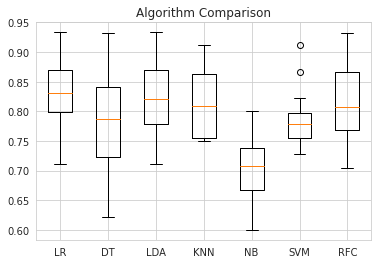

In [79]:
# Comparing Models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

`LogisticRegression` and `LinearDiscriminantAnalysis` are two top performing models. We use both of them for further processes.

# Training and Evaluating

In [80]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(inputs_df[numeric_cols+encoded_cols], target, test_size=0.25, random_state=1)

#### Making predictions on training data

In [81]:
model1 = LogisticRegression()
model2 = LinearDiscriminantAnalysis()

# Fitting the model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Making predictions on train data
train_preds1 = model1.predict(X_train)
train_preds2 = model2.predict(X_train)

# Accuracy of models for the seen data
from sklearn.metrics import accuracy_score
sd_acc_1 = accuracy_score(y_train, train_preds1)
sd_acc_2 = accuracy_score(y_train, train_preds2)

print('Accuracy of LogisticRegression on training data is ',sd_acc_1)
print('Accuracy of LinearDiscriminantAnalysis on training data is ',sd_acc_2)

Accuracy of LogisticRegression on training data is  0.8502994011976048
Accuracy of LinearDiscriminantAnalysis on training data is  0.8502994011976048


#### Predictions on validation data

In [82]:
# Making predictions on train data
val_preds1 = model1.predict(X_val)
val_preds2 = model2.predict(X_val)

# Accuracy of models for the seen data
from sklearn.metrics import accuracy_score
base_acc_1 = accuracy_score(y_val, val_preds1)
base_acc_2 = accuracy_score(y_val, val_preds2)

print('Accuracy of LogisticRegression on validation data is ',base_acc_1)
print('Accuracy of LinearDiscriminantAnalysis on validation data is ',base_acc_2)

Accuracy of LogisticRegression on validation data is  0.8161434977578476
Accuracy of LinearDiscriminantAnalysis on validation data is  0.8116591928251121


We can see that the base accuracy of `LogisticRegression` is more than`LinearDiscriminantAnalysis`.

# Making Predictions

In [83]:
# Loading the test data file
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

# Defining a function for predictions
def predictor(df):
    title_extracter(df)
    surname_extracter(df)
    ticket_grouper(df)
    cabin_text_ext(df)
    age_grouper(df)
    df[numeric_cols] = imputer.transform(df[numeric_cols])
    df[numeric_cols] = scaler.transform(df[numeric_cols])
    df[encoded_cols] = encoder.transform(df[categorical_cols])
    preds = model1.predict(df[numeric_cols+encoded_cols])
    return preds

In [84]:
# Making Predictions on the test data and saving them for submissions
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission['Survived']=predictor(test)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
sbs = submission['Survived'].value_counts()
sbs

0    245
1    173
Name: Survived, dtype: int64

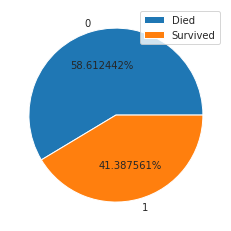

In [86]:
plt.pie(x=sbs, labels=sbs.index, autopct='%f%%')
plt.legend(['Died','Survived']);

In [87]:
submission.to_csv('submission.csv',index=False)

# Conclusion
<div class="alert alert-block alert-info" style='color:black;'>
    <p>
        1.The key factors that affected the rate of survival were age group, gender and socio-economic class (class of
        passenger and fare they paid).<br>
        2. Children and infants in all classes had higher survival rates than adults, likely due to their priority in
        evacuation procedures.<br>
        3. Men from all classes have lesser survival rate than women of the similiar class. This is partly because women and
        children were given priority access to lifeboats. Additionally, men were often expected to stay behind and help with
        the evacuation efforts.<br>
        4. Passengers in first class had a much higher survival rate than those in second and third class. This is partly
        because the lifeboats were located closer to the first-class cabins, making it easier for these passengers to access
        them. Additionally, first-class passengers were often given priority access to the lifeboats.<br>
        5. The relationship between fare and age based on the classes reflects the social and economic inequalities of the
        time, as well as the differences in travel patterns and motivations for different groups of passengers.<br>
        6. It also reflects the social hierarchy of the time, where the lives of the wealthy were deemed more valuable than
        those of the lower classes.<br>
        7. The analysis also revealed some anamolies in the dataset listed under miscellaneous section.
    </p>
</div>

##### If you find this notebook useful, please upvote it.
### Thank You!